<a href="https://colab.research.google.com/github/ShreyasJothish/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [4]:
# Check if any Null values.
df.isnull().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
# Separating independent and dependent features/variables.
X = df.drop(columns=['price'])
y = df['price']

## 1.2 Split the data into test and train datasets using train_test_split

In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, 
                                                    random_state=42)

# Check the data split.
print(X.shape, "\n")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8495, 8) 

(4247, 8)
(4248, 8)
(4247,)
(4248,)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [7]:
# Using Linear Regression to fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [8]:
print("Intercept Value: ", model.intercept_)
print("Slope Coefficient: \n", model.coef_)

Intercept Value:  -2184591.0115608736
Slope Coefficient: 
 [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]


## 1.5 Use the test data to make predictions

In [0]:
# Predict the dependent variable 
y_test_predict = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [10]:
# Calculate the Mean Squared Error and R2 by comparing prediction with actual values.
MSE = mean_squared_error(y_test, y_test_predict)
RMSE = (np.sqrt(MSE))

print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)

print('R^2 is {}'.format(R2))

RMSE is 22470.10563446866
R^2 is 0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The coefficient corresponding to the "year" feature represents the increase in Used Car Sale Price for each year increase. Or in other words for every year passes the Used Case Sale Price decreases by approximately $1098 meaning newer car fetches higher price.

## 1.8 How should we interpret the Root-Mean-Square Error?

Root Mean Square Error is the differences between values (sample or population values) predicted by a model or an estimator and the values observed.

Here high RMSE indicates the accuracy of our prediction is low.

## 1.9 How should we interpret the $R^2$?

$R^2$ is the percentage of y (dependent variable) that is explained by the X (independent variables) included in the model. Here $R^2$ value indicates approximately 27% of the Used Car Sale Price is explained by our features.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
## Create ln(price) variable
df['ln_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

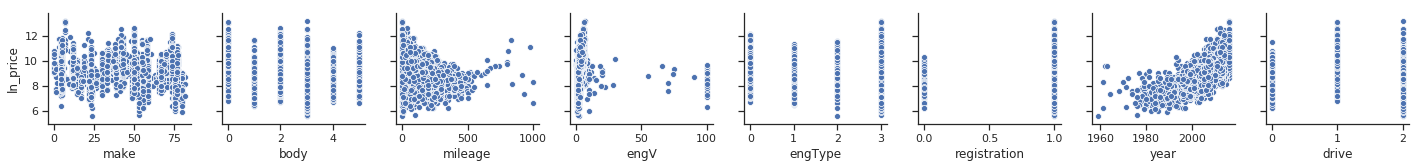

In [12]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop(['price','ln_price'])

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

In [0]:
# From the pairplot, scatter plot of year appears to be curved
# So creating a polynomial feature year^2
df['year_sq'] = df['year'] ** 2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
def ReportLinearRegressionResults(X, y, test_size=.5):
  # Split the data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size= test_size, 
                                                      random_state=42)

  # Using Linear Regression to fit the model
  model = LinearRegression()
  model.fit(X_train, y_train)

  print("Intercept Value: ", model.intercept_)
  print("Slope Coefficient: \n", model.coef_)

  # Predict the dependent variable 
  y_test_predict = model.predict(X_test)

  # Calculate the Mean Squared Error and R2 by comparing prediction with actual values.
  MSE = mean_squared_error(y_test, y_test_predict)
  RMSE = (np.sqrt(MSE))

  print('RMSE is {}'.format(RMSE))

  R2 = r2_score(y_test, y_test_predict)

  print('R^2 is {}'.format(R2))

In [15]:
# Separating independent and dependent features/variables.
X = df.drop(columns=['price','ln_price'])
y = df['ln_price']

ReportLinearRegressionResults(X, y, 0.5)

X.columns

Intercept Value:  6103.332821261489
Slope Coefficient: 
 [-1.61546879e-03 -8.56238008e-02  6.80416242e-04  9.64573698e-03
 -4.93594088e-02  6.70762698e-01 -6.19087737e+00  3.82779837e-01
  1.57155448e-03]
RMSE is 0.5553444740504578
R^2 is 0.6724141552317907


Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'year_sq'],
      dtype='object')

In [16]:
# Separating independent and dependent features/variables.
X = df.drop(columns=['price','ln_price','year_sq'])
y = df['ln_price']

ReportLinearRegressionResults(X, y, 0.5)

X.columns

Intercept Value:  -180.24161138605615
Slope Coefficient: 
 [-1.41544651e-03 -8.47951593e-02 -6.57367388e-05  9.45046486e-03
 -5.97834899e-02  7.29538096e-01  9.41169183e-02  4.01257461e-01]
RMSE is 0.5688755558287609
R^2 is 0.6562562872549206


Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive'],
      dtype='object')

In [17]:
# Separating independent and dependent features/variables.
X = df.drop(columns=['price','ln_price','year'])
y = df['ln_price']

ReportLinearRegressionResults(X, y, 0.5)

X.columns

Intercept Value:  -86.21565744777595
Slope Coefficient: 
 [-1.41736684e-03 -8.47910998e-02 -5.20478880e-05  9.45139595e-03
 -5.95598258e-02  7.28494219e-01  4.01079491e-01  2.35510107e-05]
RMSE is 0.5685074179580328
R^2 is 0.6567010387703349


Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'drive',
       'year_sq'],
      dtype='object')

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Since we have log transformed dependent variable, the coefficients and errors to be should be interpreted as percentages. Here when both year and year_sq are considered, there appears to be a significant mismatch.

Also from various combination of running LinearRegression with year and year_sq, it appears, using only year has better effect on RSME as compared to having only  year_sq or both year and year_sq.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

A Cost function tells us “how good” our model is at making predictions for a given set of parameters. The cost function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate.

## 3.2 What is the "Learning Rate" and what is its function?

Learning rate (alpha) is a hyper-parameter that controls how much we are adjusting the coefficients of our network with respect the loss gradient. With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.

A learning rate parameter  controls how much the coefficients can change on each update as part of Gradient Descent.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [18]:
# Separating independent and dependent features/variables.
X = df.drop(columns=['price','ln_price'])
y = df['ln_price']

print(X.columns)

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'year_sq'],
      dtype='object')


In [19]:
# Determine log-polynomial linear regression with robust standard errors.

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

# cov_type='HC3' handles robust standard errors.
model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1870.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:05:47   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6418.6476    624.441     10.279   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [20]:
# Check Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'year_sq'],
      dtype='object') 


[2953273039.000897, 1.060431475161977, 1.1583527741914774, 1.9368892032947695, 1.0100376419582973, 1.1547598212322845, 1.1085146982201888, 141693.16571434424, 1.1396338223459779, 141937.91485709895]


In [21]:
# Check correlation matrix to find high correlation between features.
no_const = X.drop('const', axis=1)
no_const.corr()

,make,body,mileage,engV,engType,registration,year,drive,year_sq
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444,-0.013679
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235,-0.154919
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962,-0.504345
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756,-0.041024
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859,-0.040323
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793,0.185613
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709,0.999995
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000,-0.169444
year_sq,-0.013679,-0.154919,-0.504345,-0.041024,-0.040323,0.185613,0.999995,-0.169444,1.000000


From VIF ()and correlation matrix, **year and year_sq** features are high correlated. So dropping **year_sq** and reruning the statsmodel regression.

**Note:** As a rule of thumb any variable that has a VIF > 10 needs to be dealt with (probably dropped from your model). If you see a VIF greater than 10 it is likely that two x variables are highly correlated. Remember that we can use the correlation matrix to check levels of correlation between our independent variables.

In [22]:
# Separating independent and dependent features/variables.
X = df.drop(columns=['price','ln_price','year_sq'])
y = df['ln_price']

print(X.columns)

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive'],
      dtype='object')


In [23]:
# Determine log linear regression with robust standard errors.

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

# cov_type='HC3' handles robust standard errors.
model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1654.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:05:48   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.8341      3.453    -52.653   

In [24]:
# Check Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive'],
      dtype='object') 


[123262.01363199769, 1.0591492515492282, 1.1583256001339475, 1.5496097971160896, 1.0093210319338703, 1.1411828507373443, 1.0918920928785216, 1.4585277185506464, 1.1310208897031016]


In [25]:
no_const = X.drop('const', axis=1)
no_const.corr()

,make,body,mileage,engV,engType,registration,year,drive
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000
